In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
# %matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
#import cmocean as ocm
%load_ext autoreload
%autoreload 2
import pyfesom as pf

no cmocean


# z

In [14]:
basedir = '/work/ollie/orichter/'
meshpath  = basedir+'mesh/oce0_z_grid/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0])
lon_start = min(mesh.x2)
lat_start = np.mean(mesh.y2)
lon_end   = max(mesh.x2)
lat_end   = np.mean(mesh.y2)

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds


For depth 600 model level 600.0 will be used


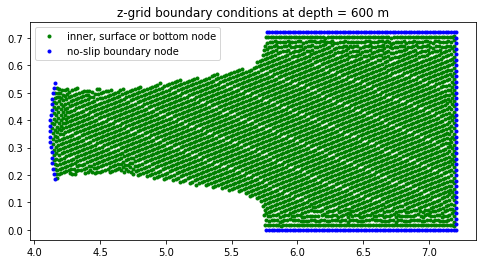

In [6]:
%matplotlib inline
depth = 600
ind = pf.fesom2depth(depth,mesh.ind3d,mesh)
nn = ~np.isnan(ind)
for i,val in enumerate(ind):
    if (val/10).is_integer():
        ind[i]=1
    else:
        ind[i]=0
br = (ind == 1) & (nn == True)
nbr = (ind ==0) & (nn == True)
#%matplotlib notebook
plt.figure(figsize=(8,4))
plt.plot(mesh.x2[br],mesh.y2[br],'g.',label='inner, surface or bottom node')
plt.plot(mesh.x2[nbr],mesh.y2[nbr],'b.',label='no-slip boundary node')
plt.legend()
plt.title('z-grid boundary conditions at depth = '+str(depth)+' m')
#plt.savefig('../../reports/figs/z_brc_'+str(depth)+'.png')
plt.show()

# sigma

In [2]:
basedir = '/work/ollie/orichter/'
meshpath  = basedir+'mesh/oce0_sigma_grid/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [3]:
mesh.n3d

229326

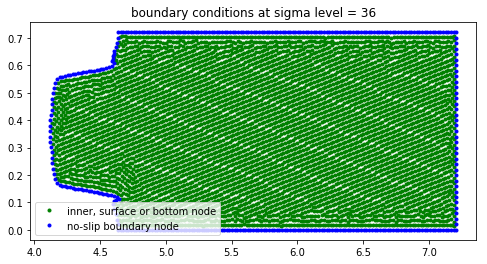

In [7]:
%matplotlib inline
sigma_level = 36
ind = mesh.ind3d[mesh.n32[:,sigma_level]-1].astype(float)
nn = ~np.isnan(ind)
for i,val in enumerate(ind):
    if (val/10).is_integer():
        ind[i]=1
    else:
        ind[i]=0
br = (ind == 1) & (nn == True)
nbr = (ind ==0) & (nn == True)
#%matplotlib notebook
plt.figure(figsize=(8,4))
plt.plot(mesh.x2[br],mesh.y2[br],'g.',label='inner, surface or bottom node')
plt.plot(mesh.x2[nbr],mesh.y2[nbr],'b.',label='no-slip boundary node')
plt.legend()
plt.title('boundary conditions at sigma level = '+str(sigma_level))
#plt.savefig('../../reports/figs/s_brc_'+str(sigma_level)+'.png')
plt.show()

In [133]:
i2d = np.arange(mesh.n2d)
imin=i2d[mesh.x2 == mesh.x2.min()]

In [135]:
i3min = mesh.n32[imin,:]
i3min.shape

(3, 37)

In [138]:
mesh.ind3d[i3min[2]]

array([11, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 30, 21])

In [139]:
mesh.n32[:,1]

array([   1,    2,    3, ..., 6196, 6197, 6198], dtype=int32)

In [54]:
(x in mesh.n32 for x in i3d)

<generator object <genexpr> at 0x7f1a2e231460>

In [56]:
x = np.empty_like(mesh.x2)
y = np.empty_like(mesh.y2)
ind = np.empty_like(mesh.ind2d)

for i,row in enumerate(mesh.n32):
    if any(x in row for x in i3d):
        x[i]=mesh.x2[row[0]]
        y[i]=mesh.y2[row[0]]

In [86]:
x>0

array([ 4.6441,  0.    ,  0.    , ...,  4.6052,  6.5081,  0.    ])

In [79]:
br_mask = mesh.ind3d[i3d]
for i,val in enumerate(br_mask):
    if val in list([11,21,31]):
        br_mask[i]=1
    else:
        br_mask[i]=0

In [84]:
br_mask.sum()

376

<IPython.core.display.Javascript object>


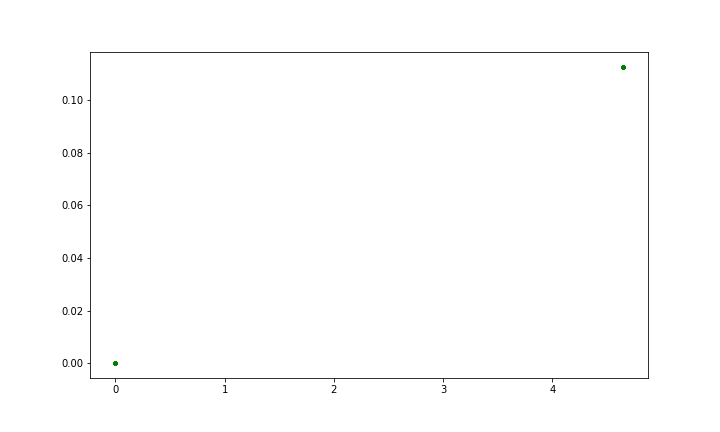

In [85]:
%matplotlib notebook
plt.figure(figsize=(10,6))
plt.plot(x[br_mask],y[br_mask],'g.')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(mesh.x2[br],mesh.y2[br],'g.',mesh.x2[~br],mesh.y2[~br],'b.')
plt.show()

In [3]:
data = mesh.ind3d
levels = [0,10,11,20,21,30,31]

In [4]:
data

array([11, 11, 11, ..., 30, 20, 30])

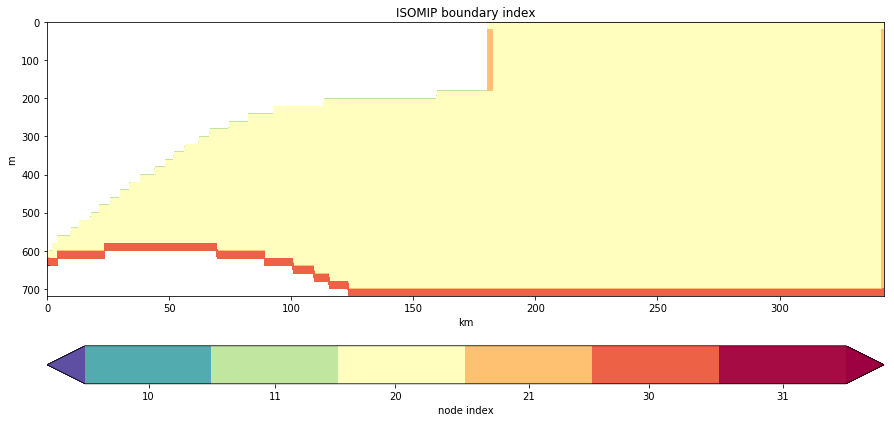

In [5]:
%matplotlib inline

npoints = 1000
fig, ax = plt.subplots(1,1, figsize=(15,7))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         levels = levels,
                         cmap=cm.Spectral_r,
                         maxdepth =6000,
                         title = 'ISOMIP boundary index',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13, extend='neither')

loc = np.array(levels) + .5
cb.set_ticks([5,10.5,15,20.5,25,30.5])
cb.set_ticklabels(levels[1:])
cb.set_label('node index')

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds
For depth 100 model level 100.0 will be used


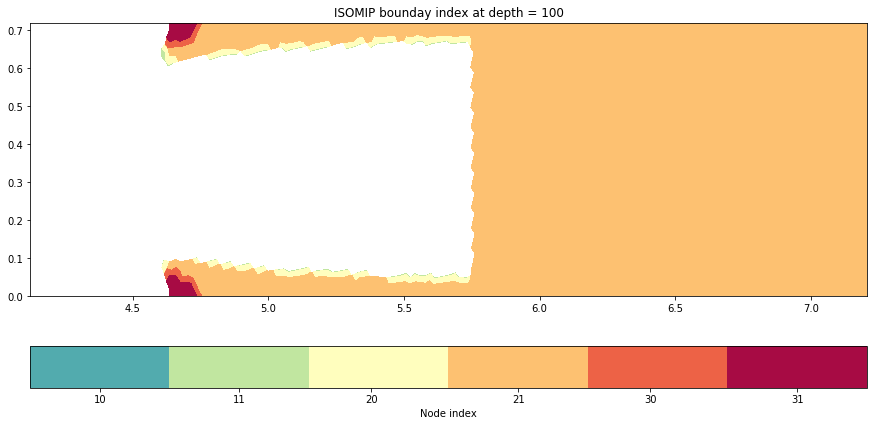

In [68]:
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0])
depth = 100
plt.figure(figsize=(15,7))
level_data, elem_no_nan = pf.get_data(data,mesh,depth)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='neither')
cb = plt.colorbar(orientation='horizontal', pad=0.13);
cb.set_label("Node index")
loc = np.array(levels) + .5
cb.set_ticks([5,10.5,15,20.5,25,30.5])
cb.set_ticklabels(levels[1:])
plt.title('ISOMIP bounday index at depth = '+str(depth))
plt.show()

For depth 20 model level 20.0 will be used


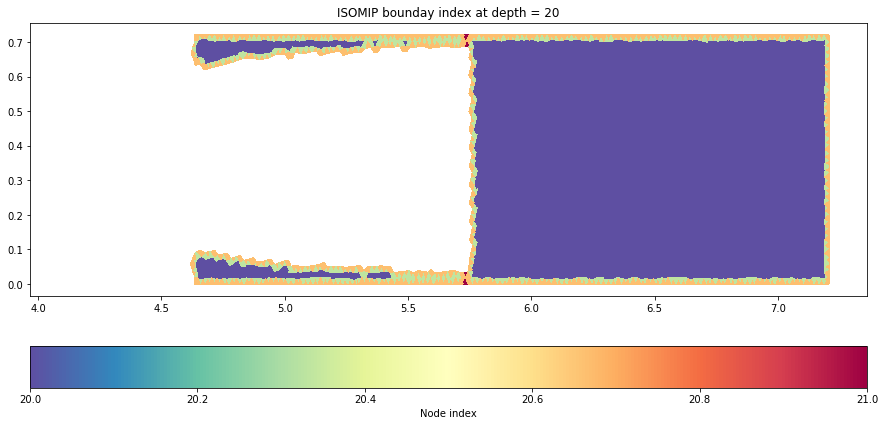

In [71]:
depth = 20
plt.figure(figsize=(15,7))
level_data, elem_no_nan = pf.get_data(data,mesh,depth)
plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan[::], level_data, cmap=cm.Spectral_r)
cb = plt.colorbar(orientation='horizontal', pad=0.13);
cb.set_label("Node index")
#loc = np.array(levels) + .5
#cb.set_ticks([5,10.5,15,20.5,25,30.5])
#cb.set_ticklabels(levels[1:])
plt.title('ISOMIP bounday index at depth = '+str(depth))
plt.show()

In [ ]:
mesh